# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [2]:
genome_ids = ['HG00349', 'HG00327', 'HG00266', 'HG00323', 'HG00368', 'HG00326', 'HG00270', 'HG00321', 'HG00337', 'HG00189', 'HG00272', 'HG00382', 'HG00364', 'HG00304', 'HG00339', 'HG00330', 'HG00355', 'HG00186', 'HG00308', 'HG00353', 'HG00285', 'HG00273', 'HG00371', 'HG00274', 'HG00375', 'HG00282', 'HG00346', 'HG00345', 'HG00325', 'HG00367', 'HG00183', 'HG00366', 'HG00358', 'HG00275', 'HG00177', 'HG00178', 'HG00338', 'HG00319', 'HG00311', 'HG00381', 'HG00334', 'HG00277', 'HG00369', 'HG00324', 'HG00267', 'HG00372', 'HG00342', 'HG00284', 'HG00190', 'HG00181', 'HG00356', 'HG00180', 'HG00176', 'HG00271', 'HG00362', 'HG00288', 'HG00384', 'HG00182', 'HG00376', 'HG00336', 'HG00350', 'HG00318', 'HG00188', 'HG00344', 'HG00315', 'HG00269', 'HG00335', 'HG00179', 'HG00377', 'HG00185', 'HG00359', 'HG00383', 'HG00380', 'HG00276', 'HG00268', 'HG00332', 'HG00278', 'HG00365', 'HG00281', 'HG00343', 'HG00351', 'HG00187', 'HG00373', 'HG00320', 'HG00310', 'HG00171', 'HG00313', 'HG00357', 'HG00361', 'HG00379', 'HG00378', 'HG00309', 'HG00328', 'HG00290', 'HG00331', 'HG00329', 'HG00174', 'HG00312', 'HG00306', 'HG00341', 'HG00360', 'HG00280', 'HG00173']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [4]:
root_dir = join(Path.home(),"cp_als/populations")

In [5]:
infile = join(root_dir,"output/FIN/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/FIN/all.csv'

In [6]:
df = pd.read_csv(infile)

In [7]:
df = df[genome_ids + ['gene']]
df.head()

,HG00349,HG00327,HG00266,HG00323,HG00368,HG00326,HG00270,HG00321,HG00337,HG00189,...,HG00331,HG00329,HG00174,HG00312,HG00306,HG00341,HG00360,HG00280,HG00173,gene
0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,TARDBP
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP


## Computer variant count per gene and per genome

In [8]:
sdf=df.groupby(["gene"]).sum()

In [9]:
sdf.head()

,HG00349,HG00327,HG00266,HG00323,HG00368,HG00326,HG00270,HG00321,HG00337,HG00189,...,HG00290,HG00331,HG00329,HG00174,HG00312,HG00306,HG00341,HG00360,HG00280,HG00173
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,8,6,1,4,7,4,5,4,11,6,...,4,2,8,16,4,3,4,9,6,17
ANG,0,5,1,1,0,8,0,15,5,0,...,7,5,19,0,4,5,9,4,3,4
ATXN2,13,9,18,10,11,15,9,13,14,11,...,25,16,10,8,14,9,12,21,11,14
C19ORF12,13,10,9,7,17,10,7,7,4,7,...,8,8,8,10,7,16,10,8,6,9
C9ORF72,35,13,15,13,5,24,20,23,14,0,...,22,22,22,36,15,23,22,9,22,13


## Compute mean99

In [10]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [11]:
mean99.head()

,0
HG00349,8.767677
HG00327,12.020202
HG00266,14.696970
HG00323,14.222222
HG00368,13.242424


In [12]:
m99 = mean99.transpose()

In [13]:
m99

,HG00349,HG00327,HG00266,HG00323,HG00368,HG00326,HG00270,HG00321,HG00337,HG00189,...,HG00290,HG00331,HG00329,HG00174,HG00312,HG00306,HG00341,HG00360,HG00280,HG00173
0,8.767677,12.020202,14.69697,14.222222,13.242424,13.262626,10.515152,12.737374,12.40404,13.373737,...,11.858586,11.919192,16.343434,14.878788,10.252525,12.969697,15.555556,15.626263,10.848485,12.171717


## Name the row "mean99" to append to the dataframe 

In [14]:
m99.index=["mean99"]

In [15]:
m99.head()

,HG00349,HG00327,HG00266,HG00323,HG00368,HG00326,HG00270,HG00321,HG00337,HG00189,...,HG00290,HG00331,HG00329,HG00174,HG00312,HG00306,HG00341,HG00360,HG00280,HG00173
mean99,8.767677,12.020202,14.69697,14.222222,13.242424,13.262626,10.515152,12.737374,12.40404,13.373737,...,11.858586,11.919192,16.343434,14.878788,10.252525,12.969697,15.555556,15.626263,10.848485,12.171717


## Compute statistics per genome, across all genes

In [16]:
genome_stats= sdf.describe()

In [17]:
genome_stats.head()

,HG00349,HG00327,HG00266,HG00323,HG00368,HG00326,HG00270,HG00321,HG00337,HG00189,...,HG00290,HG00331,HG00329,HG00174,HG00312,HG00306,HG00341,HG00360,HG00280,HG00173
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,24.111111,33.055556,40.416667,39.111111,36.416667,36.472222,28.916667,35.027778,34.111111,36.777778,...,32.611111,32.777778,44.944444,40.916667,28.194444,35.666667,42.777778,42.972222,29.833333,33.472222
std,84.293290,148.945042,182.467903,161.089465,162.696101,140.328693,117.751888,124.946500,117.286896,136.730415,...,103.814746,137.962337,180.421244,180.076869,110.728708,149.884336,191.431019,196.257482,104.080326,141.545850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.750000,1.750000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000


### Adding new rows for genomes to show variant statistics

In [18]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [19]:
genome_stats_df

,HG00349,HG00327,HG00266,HG00323,HG00368,HG00326,HG00270,HG00321,HG00337,HG00189,...,HG00290,HG00331,HG00329,HG00174,HG00312,HG00306,HG00341,HG00360,HG00280,HG00173
ALS2,8.000000,6.000000,1.000000,4.000000,7.000000,4.000000,5.000000,4.000000,11.000000,6.000000,...,4.000000,2.000000,8.000000,16.000000,4.000000,3.000000,4.000000,9.000000,6.000000,17.000000
ANG,0.000000,5.000000,1.000000,1.000000,0.000000,8.000000,0.000000,15.000000,5.000000,0.000000,...,7.000000,5.000000,19.000000,0.000000,4.000000,5.000000,9.000000,4.000000,3.000000,4.000000
ATXN2,13.000000,9.000000,18.000000,10.000000,11.000000,15.000000,9.000000,13.000000,14.000000,11.000000,...,25.000000,16.000000,10.000000,8.000000,14.000000,9.000000,12.000000,21.000000,11.000000,14.000000
C19ORF12,13.000000,10.000000,9.000000,7.000000,17.000000,10.000000,7.000000,7.000000,4.000000,7.000000,...,8.000000,8.000000,8.000000,10.000000,7.000000,16.000000,10.000000,8.000000,6.000000,9.000000
C9ORF72,35.000000,13.000000,15.000000,13.000000,5.000000,24.000000,20.000000,23.000000,14.000000,0.000000,...,22.000000,22.000000,22.000000,36.000000,15.000000,23.000000,22.000000,9.000000,22.000000,13.000000
CHCHD10,3.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000
CHMP2B,11.000000,13.000000,7.000000,9.000000,14.000000,11.000000,16.000000,4.000000,11.000000,11.000000,...,10.000000,13.000000,4.000000,6.000000,11.000000,11.000000,6.000000,16.000000,14.000000,14.000000
CHRNA3,14.000000,14.000000,17.000000,13.000000,18.000000,22.000000,14.000000,18.000000,19.000000,6.000000,...,18.000000,23.000000,7.000000,15.000000,20.000000,22.000000,15.000000,28.000000,19.000000,30.000000
CREST,6.000000,3.000000,83.000000,5.000000,6.000000,3.000000,7.000000,1.000000,122.000000,2.000000,...,2.000000,5.000000,3.000000,4.000000,3.000000,5.000000,5.000000,4.000000,5.000000,6.000000
DAO,2.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,9.000000,1.000000,3.000000,...,3.000000,0.000000,2.000000,9.000000,2.000000,6.000000,2.000000,2.000000,0.000000,0.000000


### Compute per gene stats

In [20]:
gene_df = sdf.transpose().describe()

In [21]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,103.0,8.902913,9.591167,0.0,3.0,6.0,9.0,49.0
ANG,103.0,4.893204,5.654969,0.0,0.5,3.0,8.0,22.0
ATXN2,103.0,13.038835,4.392334,3.0,10.0,12.0,15.0,25.0
C19ORF12,103.0,9.291262,3.701169,1.0,7.0,8.0,11.0,20.0
C9ORF72,103.0,20.495146,8.970402,0.0,13.0,22.0,24.0,37.0
CHCHD10,103.0,1.854369,0.833229,0.0,1.0,2.0,2.5,4.0
CHMP2B,103.0,10.466019,6.225840,0.0,5.5,10.0,13.0,30.0
CHRNA3,103.0,21.000000,6.899844,4.0,17.0,21.0,28.0,32.0
CREST,103.0,19.766990,32.869380,0.0,3.0,5.0,7.0,122.0


In [22]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [23]:
rdf.head()

,HG00349,HG00327,HG00266,HG00323,HG00368,HG00326,HG00270,HG00321,HG00337,HG00189,...,HG00280,HG00173,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,8,6,1,4,7,4,5,4,11,6,...,6,17,103.0,8.902913,9.591167,0.0,3.0,6.0,9.0,49.0
ANG,0,5,1,1,0,8,0,15,5,0,...,3,4,103.0,4.893204,5.654969,0.0,0.5,3.0,8.0,22.0
ATXN2,13,9,18,10,11,15,9,13,14,11,...,11,14,103.0,13.038835,4.392334,3.0,10.0,12.0,15.0,25.0
C19ORF12,13,10,9,7,17,10,7,7,4,7,...,6,9,103.0,9.291262,3.701169,1.0,7.0,8.0,11.0,20.0
C9ORF72,35,13,15,13,5,24,20,23,14,0,...,22,13,103.0,20.495146,8.970402,0.0,13.0,22.0,24.0,37.0


In [24]:
rdf

,HG00349,HG00327,HG00266,HG00323,HG00368,HG00326,HG00270,HG00321,HG00337,HG00189,...,HG00280,HG00173,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,8,6,1,4,7,4,5,4,11,6,...,6,17,103.0,8.902913,9.591167,0.0,3.0,6.0,9.0,49.0
ANG,0,5,1,1,0,8,0,15,5,0,...,3,4,103.0,4.893204,5.654969,0.0,0.5,3.0,8.0,22.0
ATXN2,13,9,18,10,11,15,9,13,14,11,...,11,14,103.0,13.038835,4.392334,3.0,10.0,12.0,15.0,25.0
C19ORF12,13,10,9,7,17,10,7,7,4,7,...,6,9,103.0,9.291262,3.701169,1.0,7.0,8.0,11.0,20.0
C9ORF72,35,13,15,13,5,24,20,23,14,0,...,22,13,103.0,20.495146,8.970402,0.0,13.0,22.0,24.0,37.0
CHCHD10,3,1,2,2,3,3,1,2,1,1,...,1,1,103.0,1.854369,0.833229,0.0,1.0,2.0,2.5,4.0
CHMP2B,11,13,7,9,14,11,16,4,11,11,...,14,14,103.0,10.466019,6.225840,0.0,5.5,10.0,13.0,30.0
CHRNA3,14,14,17,13,18,22,14,18,19,6,...,19,30,103.0,21.000000,6.899844,4.0,17.0,21.0,28.0,32.0
CREST,6,3,83,5,6,3,7,1,122,2,...,5,6,103.0,19.766990,32.869380,0.0,3.0,5.0,7.0,122.0


# Plot bar chart of total variant counts per gene


In [25]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [26]:
gdf=df.groupby(["gene"]).count()

In [27]:
gdf

,POS
gene,
ALS2,162
ANG,42
ATXN2,194
C19ORF12,44
C9ORF72,106
CHCHD10,9
CHMP2B,76
CHRNA3,72
CREST,229


In [28]:
gdf.reset_index(inplace=True)

In [29]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [30]:
gdf

,gene,variant_count
0,ERBB4,4414
1,NEK1,612
2,FIG4,339
3,SETX,257
4,CREST,229
5,SPG11,210
6,ATXN2,194
7,ELP3,188
8,VAPB,188
9,ALS2,162


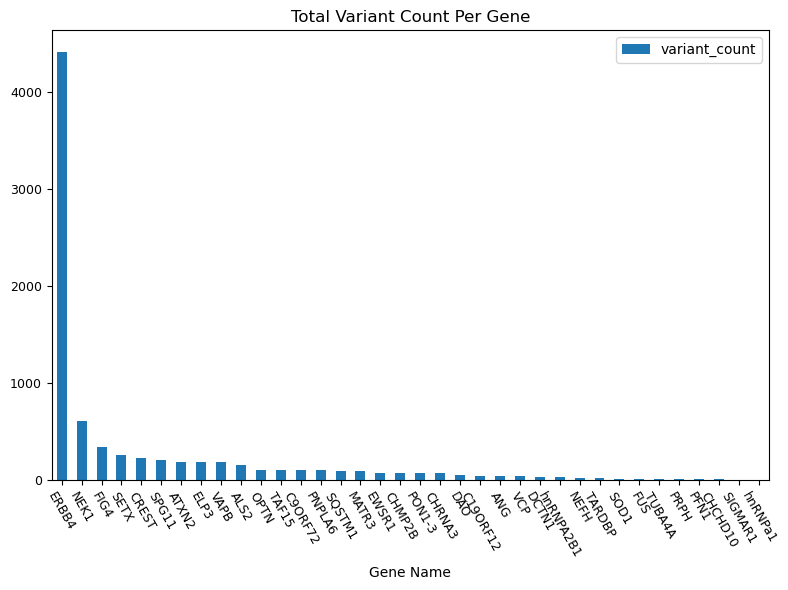

In [31]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [32]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'CREST']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [33]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [34]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [35]:
hdf.reset_index(inplace=True)

In [36]:
hdf.head()

,index,count
0,HG00349,868
1,HG00327,1190
2,HG00266,1455
3,HG00323,1408
4,HG00368,1311


In [37]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(1340.2621359223301), 214.0594090692567)

## Find top and bottom genomes using mean & STD

In [38]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [39]:
len(top_genomes)

18

In [40]:
len(bottom_genomes)

19

In [41]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [42]:
sdf.head()

,HG00349,HG00327,HG00266,HG00323,HG00368,HG00326,HG00270,HG00321,HG00337,HG00189,...,HG00290,HG00331,HG00329,HG00174,HG00312,HG00306,HG00341,HG00360,HG00280,HG00173
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,8,6,1,4,7,4,5,4,11,6,...,4,2,8,16,4,3,4,9,6,17
ANG,0,5,1,1,0,8,0,15,5,0,...,7,5,19,0,4,5,9,4,3,4
ATXN2,13,9,18,10,11,15,9,13,14,11,...,25,16,10,8,14,9,12,21,11,14
C19ORF12,13,10,9,7,17,10,7,7,4,7,...,8,8,8,10,7,16,10,8,6,9
C9ORF72,35,13,15,13,5,24,20,23,14,0,...,22,22,22,36,15,23,22,9,22,13


In [43]:
tgdf= sdf.loc[top_genes]

In [44]:
tgdf_top_genomes = tgdf[top_genomes]

In [45]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [46]:
tgdf_top_genomes.head()

,HG00272,HG00330,HG00285,HG00375,HG00366,HG00358,HG00267,HG00372,HG00190,HG00181,HG00271,HG00318,HG00315,HG00335,HG00343,HG00361,HG00328,HG00329
gene,,,,,,,,,,,,,,,,,,
ERBB4,1009,1095,1020,1155,1191,1242,1032,967,1068,1305,1076,1152,914,1212,1083,960,1056,1077
NEK1,200,210,320,50,16,213,214,235,231,48,237,217,239,213,47,226,213,209
FIG4,67,50,23,38,53,40,37,50,70,28,56,54,40,63,44,44,51,58
SETX,22,51,8,56,22,6,26,7,7,8,24,23,42,6,48,38,13,5
CREST,5,4,4,82,5,88,4,82,0,4,80,7,85,3,87,1,3,3


In [47]:
tgdf_bot_genomes.head()

,HG00349,HG00270,HG00382,HG00355,HG00308,HG00371,HG00346,HG00183,HG00178,HG00362,HG00179,HG00377,HG00351,HG00373,HG00320,HG00171,HG00379,HG00312,HG00280
gene,,,,,,,,,,,,,,,,,,,
ERBB4,512,712,400,596,611,659,742,688,655,683,620,492,652,622,717,661,637,671,609
NEK1,8,11,3,185,186,47,13,43,7,49,209,18,47,7,47,44,39,44,189
FIG4,39,55,4,4,24,36,48,54,44,42,51,32,21,41,42,55,71,18,18
SETX,26,9,7,8,6,7,5,26,28,6,11,4,8,21,11,9,27,25,21
CREST,6,7,81,2,6,82,4,7,57,4,5,2,4,87,4,5,9,3,5


## Plot stacked bar chart for top genes & top genomes

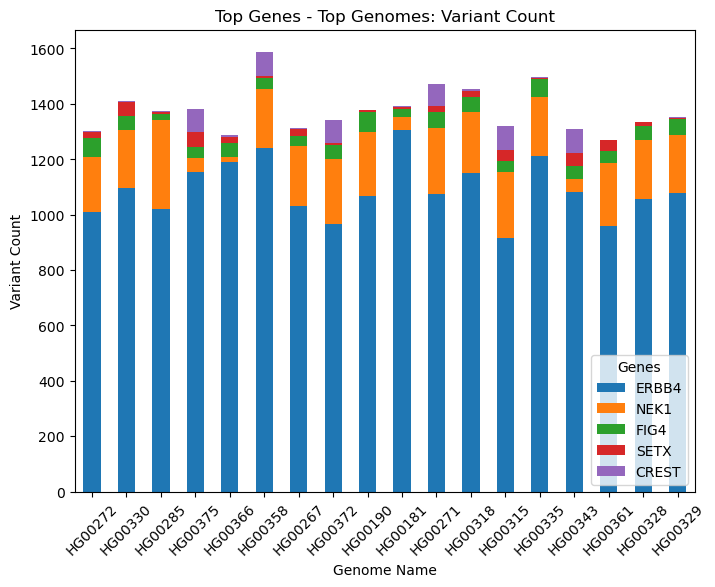

In [48]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

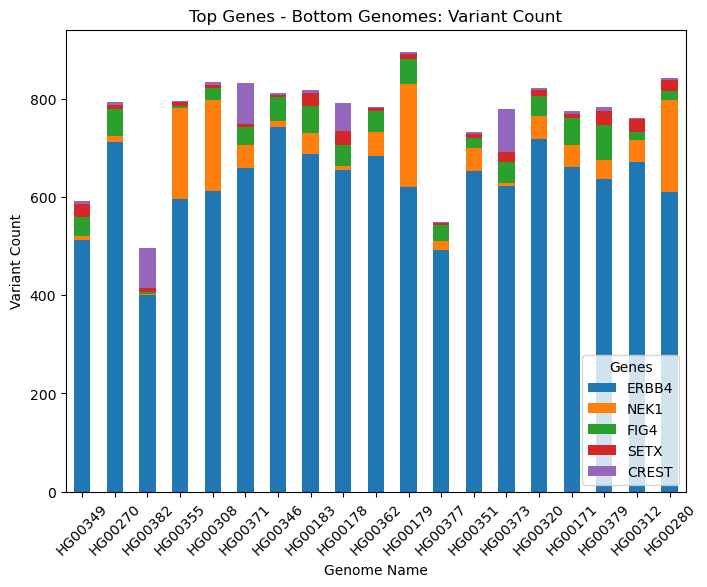

In [49]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()